In [1]:
import numpy as np
import sys
sys.path.append(r'C:\Users\zhang\1_jupyter_code\1_Functions')
import matplotlib.pyplot as plt
from cal_ppp_dis import cal_ppp_distance as cal_dis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.font_manager import FontProperties

In [3]:
file_path = r'C:\Users\zhang\Desktop\md\2024corning\june\sphere_ti\14cry_300k_out.xyz'

In [4]:
def read_xyz_frames(file_path):
    frames = []
    current_frame = None

    with open(file_path, 'r') as file:
        lines = file.readlines()
        line_index = 0

        while line_index < len(lines):
            line = lines[line_index].strip()

            if line.isdigit():
                # 读取原子数
                if current_frame:
                    frames.append(current_frame)
                num_atoms = int(line)
                current_frame = {"num_atoms": num_atoms, "atoms": []}
                line_index += 2  # 跳过标题行 "Atoms"
            else:
                # 读取原子坐标
                if current_frame:
                    atom_data = line.split()
                    if len(atom_data) == 4:
                        element, x, y, z = atom_data
                        current_frame["atoms"].append({
                            "element": element,
                            "x": float(x),
                            "y": float(y),
                            "z": float(z)
                        })
                line_index += 1

        if current_frame:
            frames.append(current_frame)

    return frames

# 使用之前的frames列表
frames = read_xyz_frames(file_path)

# 找出最大的x、y和z值
max_x = max([max(frame["atoms"], key=lambda atom: atom["x"])["x"] for frame in frames])
max_y = max([max(frame["atoms"], key=lambda atom: atom["y"])["y"] for frame in frames])
max_z = max([max(frame["atoms"], key=lambda atom: atom["z"])["z"] for frame in frames])

print("Maximum X value:", max_x)
print("Maximum Y value:", max_y)
print("Maximum Z value:", max_z)


Maximum X value: 64.130025
Maximum Y value: 64.133225
Maximum Z value: 64.13243


In [22]:
c_ti,c_o,c_si,c_al,c_li = 0,0,0,0,0
for i_atom in frames[0]['atoms']:
    if i_atom['element']=='O':
        c_o+=1
    elif i_atom['element']=='Si':
        c_si+=1
    elif i_atom['element']=='Al':
        c_al+=1
    elif i_atom['element']=='Ti':
        c_ti+=1
    elif i_atom['element']=='Li':
        c_li+=1
print(f'Ti:{c_ti} Si:{c_si} Al:{c_al} O:{c_o} Li:{c_li}')
c_all = c_al+c_si+c_ti+c_li+c_o
print(c_all)

Ti:421 Si:3442 Al:2658 O:12250 Li:1074
19845


In [23]:
c_al+c_si-c_ti*2+c_li+c_o

18582

In [19]:
print(f'C_Al = {c_al/c_all}')

C_Al = 0.3499670836076366


In [16]:
# 计算一个表/体


0.9928003031451307

In [13]:
83.6/6.46

12.941176470588234

In [5]:
box_size = (max_x+0.01,max_y+0.01,max_z+0.01)

In [6]:
frames[0]['atoms'][20]

{'element': 'O', 'x': 3.404466, 'y': 22.852492, 'z': 5.54755}

In [7]:
 # 模拟中的周期性边界条件，假设每个维度的边界大小
box_size = np.array([max_x, max_y, max_z])  # 根据您的模拟设置
print(box_size)
print('frames length:',len(frames))

[84.194676 54.974715 11.43487 ]
frames length: 250


In [15]:
def get_xyz(frames,strat_frame_num,ana_element):
    # 取出相对应的帧数 
    start_frame = frames[start_frame_num]
    start_xyz = []
    for i in start_frame['atoms']:
        if i['element'] == ana_element:
            start_xyz.append([i['x'],i['y'],i['z']])
    start_xyz = np.array(start_xyz)
    return start_xyz

# 现在是要画出某一帧数中 Al/Si原子的二维分布的比值

In [13]:
ana_frame = 0
first_element = 'Si'
second_element = 'Al'

In [17]:
first_list = get_xyz(frames,ana_frame,first_element)
second_list = get_xyz(frames,ana_frame,second_element)

C:\Users\zhang\AppData\Local\Temp\ipykernel_23688\1598990906.py:31: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_a / hist_b
C:\Users\zhang\AppData\Local\Temp\ipykernel_23688\1598990906.py:31: RuntimeWarning: invalid value encountered in divide
  ratio = hist_a / hist_b


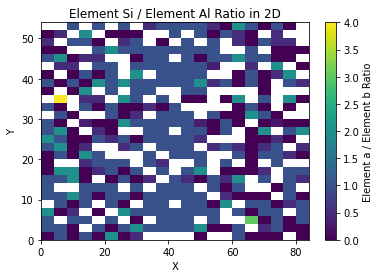

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def custom_histogram2d(x, y, x_bins, y_bins):
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[x_bins, y_bins])
    return hist, x_edges, y_edges

# 示例数据

a_list = first_list
b_list = second_list

# 设置 x 和 y 的最小 bin 大小
min_x_bin, max_x_bin = 0, 84
min_y_bin, max_y_bin = 0, 54
bin_size_x, bin_size_y = 4, 2  # 设置 x 和 y 的最小 bin 大小

# 计算 bin 的数量
num_x_bins = int((max_x_bin - min_x_bin) / bin_size_x)
num_y_bins = int((max_y_bin - min_y_bin) / bin_size_y)

# 创建 bin 的边界
x_bins = np.linspace(min_x_bin, max_x_bin, num_x_bins + 1)
y_bins = np.linspace(min_y_bin, max_y_bin, num_y_bins + 1)

# 使用自定义的 histogram2d 函数
hist_a, x_edges, y_edges = custom_histogram2d(a_list[:, 0], a_list[:, 1], x_bins, y_bins)
hist_b, _, _ = custom_histogram2d(b_list[:, 0], b_list[:, 1], x_bins, y_bins)

# 计算数量比值
ratio = hist_a / hist_b

# 创建二维区域网格
x, y = np.meshgrid(x_edges[:-1], y_edges[:-1])

# 绘制数量比值的热力图
plt.imshow(ratio.T, extent=(min_x_bin, max_x_bin, min_y_bin, max_y_bin), origin='lower', cmap='viridis', interpolation='nearest', aspect='auto')

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label('Element a / Element b Ratio')

# 添加标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Element Si / Element Al Ratio in 2D')

# 显示图形
plt.show()


In [9]:
def draw(start_frame_num,end_frame_num ,start_xyz,end_xyz,ana_element):

    # 设置全局字体属性
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12

    # 设置图像大小
    fig = plt.figure(figsize=(12, 8))

    # 两帧原子的xyz数据，每一帧包含原子的位置信息
    frame1 = np.array(start_xyz)
    frame2 = np.array(end_xyz)

    # 盒子尺寸，假设为 [box_x, box_y, box_z]
    #box_size = [10.0, 10.0, 10.0]

    # 计算位移向量
    displacements = frame2[:, :2] - frame1[:, :2]

    # 考虑周期性边界条件，根据盒子尺寸修正位移
    for i in range(len(displacements)):
        for dim in range(2):  # 仅考虑 xy 平面
            if displacements[i, dim] > box_size[dim] / 2:
                displacements[i, dim] -= box_size[dim]
            elif displacements[i, dim] < -box_size[dim] / 2:
                displacements[i, dim] += box_size[dim]

    # 计算位移大小
    displacement_magnitude = np.linalg.norm(displacements, axis=1)

    # 计算位移方向
    displacement_direction = displacements / displacement_magnitude[:, np.newaxis]

    # 设置箭头的长度的倍数
    arrow_scale = 2  # 可以根据需要调整箭头的长度

    # 设置颜色映射范围，根据位移大小来映射颜色
    norm = Normalize(vmin=min(displacement_magnitude), vmax=max(displacement_magnitude))

    # 绘制位移图，将位移大小与箭头长度相乘
    plt.quiver(frame1[:, 0], frame1[:, 1], arrow_scale * displacement_direction[:, 0], arrow_scale * displacement_direction[:, 1], 
               arrow_scale * displacement_magnitude, cmap='viridis', angles='xy', scale_units='xy', scale=1, norm=norm)

    # 
    # 设置标题和轴标签的字体和字体大小，以及使用Times New Roman字体
    label_font = FontProperties(family='Times New Roman', style='normal', size=18, weight='bold')


    # 设置图形范围，根据盒子尺寸
    plt.xlim(0, box_size[0])
    plt.ylim(0, box_size[1])
    plt.xlabel('X (Å)',fontproperties=label_font)
    plt.ylabel('Y (Å)',fontproperties=label_font)
    # 添加颜色条

    title = 'The displacement of '+ ana_element+ ' : '+str(start_frame_num) +' - '+ str(end_frame_num)##+' frame (100ns/1000frames) ' #(60ns/1000frames)
    plt.title(title, fontproperties=label_font)


    # 设置颜色条字体大小、粗细和字体族
    cbar = plt.colorbar(label='Displacement Magnitude')
    cbar.ax.tick_params(labelsize=12, width=2)  # 设置字体大小和粗细
    cbar.ax.yaxis.label.set_font_properties(FontProperties(family='Times New Roman', style='normal', size=12, weight='bold'))

    

    # 显示图形
    plt.show()


# 开始画图

In [10]:
start_frame_num = 10
end_frame_num = 20

ana_element = 'O'
####################
start_xyz,end_xyz = get_xyz(frames,start_frame_num,end_frame_num,ana_element)

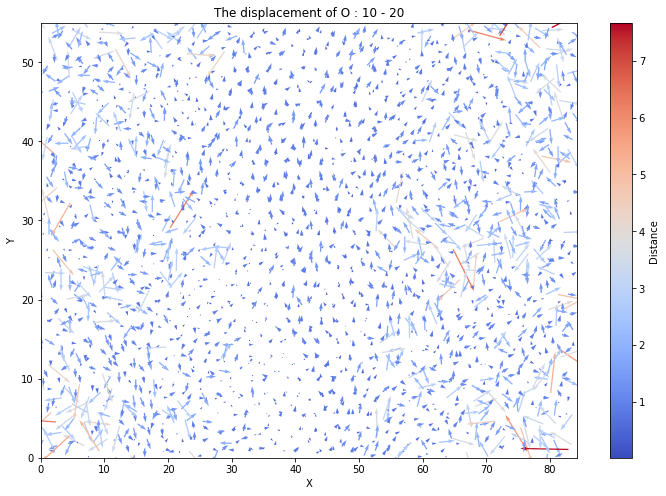

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 positions 是一个包含两个帧的原子位置的三维数组，每行代表一个原子的x、y、z坐标
frame1 = start_xyz
frame2 = end_xyz


# 计算三维原子位移矢量，考虑周期性边界条件
displacements = frame2 - frame1

# 计算位移矢量的投影到xy平面上，考虑周期性边界条件

# box_size = [x_size, y_size, z_size]  # 假设 box_size 包含x、y、z方向的单元格尺寸
x_size = box_size[0]
y_size=box_size[1]
z_size= box_size[2]


displacements[:, 0] = (displacements[:, 0] + 0.5 * box_size[0]) % box_size[0] - 0.5 * box_size[0]
displacements[:, 1] = (displacements[:, 1] + 0.5 * box_size[1]) % box_size[1] - 0.5 * box_size[1]

# 计算每个原子的距离，只考虑xy平面上的距离
distances = np.linalg.norm(displacements[:, :2], axis=1)

# 设置颜色映射，距离长的原子位移颜色越深
cmap = plt.get_cmap('coolwarm')
normalize = plt.Normalize(vmin=min(distances), vmax=max(distances))
colors = cmap(normalize(distances))

# 创建一个图形
plt.figure(figsize=(12, 8))
plt.quiver(frame1[:, 0], frame1[:, 1], displacements[:, 0], displacements[:, 1], color=colors, angles='xy', scale_units='xy', scale=1)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Distance')

# 设置坐标轴范围等其他属性
plt.xlim(0, x_size)
plt.ylim(0, y_size)
plt.xlabel('X')
plt.ylabel('Y')
title = 'The displacement of '+ ana_element+ ' : '+str(start_frame_num) +' - '+ str(end_frame_num) ## + ' frame (100ns/1000frames)'
plt.title(title)

# 显示图形
plt.show()


# 其他方式

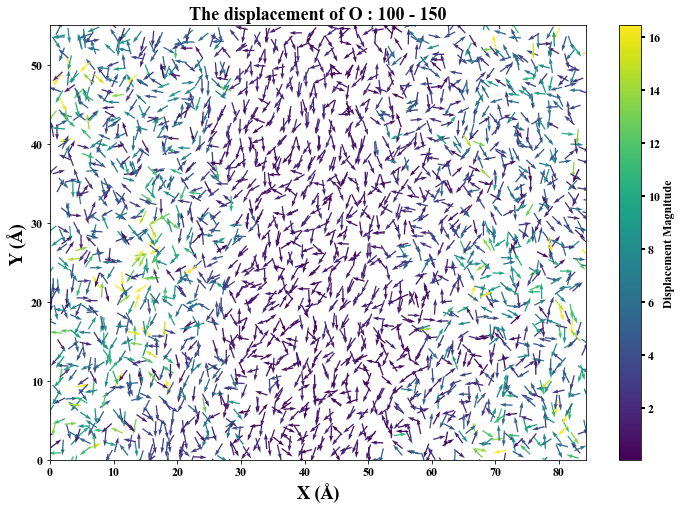

In [12]:
# 分析两个帧数之间的msd  也就是位移差
start_frame_num = 100
end_frame_num = 150

ana_element = 'O'
####################
start_xyz,end_xyz = get_xyz(frames,start_frame_num,end_frame_num,ana_element)
draw(start_frame_num,end_frame_num ,start_xyz,end_xyz,ana_element)


In [13]:
# 

In [14]:
start_frame_num = 190
end_frame_num = 320

ana_element = 'O'
####################
start_xyz,end_xyz = get_xyz(frames,start_frame_num,end_frame_num,ana_element)

IndexError: list index out of range

In [ ]:
# 取出相对应的帧数 
start_frame = frames[start_frame_num]
end_frame = frames[end_frame_num]

start_xyz, end_xyz = [],[]
for i,j in zip(start_frame['atoms'], end_frame['atoms']):
    if i['element'] == ana_element:
        start_xyz.append([i['x'],i['y'],i['z']])
    if j['element'] == ana_element:
        end_xyz.append([j['x'],j['y'],j['z']])
start_xyz, end_xyz = np.array(start_xyz), np.array(end_xyz)
print(len(start_xyz),len(end_xyz))

In [ ]:
x_list,y_list,msd = [], [],[]
for i,j in zip(start_xyz,end_xyz):
        x_list.append(j[0])
        y_list.append(j[1])
        dis = cal_dis(i,j,box_size)
        msd.append(dis)
print(len(msd))

In [ ]:
import matplotlib.pyplot as plt


# 假设x_list包含原子的x坐标，z_list包含原子的z坐标，cn_list包含权重值
# x_list = [1.0, 2.0, 3.0, 4.0]  # 用您的实际数据替换这些示例数据
# z_list = [0.5, 1.0, 1.5, 2.0]  # 用您的实际数据替换这些示例数据
# cn_list = [0.1, 0.5, 0.8, 0.3]  # 用您的实际数据替换这些示例数据

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制二维权重值分布图
plt.scatter(x_list, y_list, c=msd, cmap='cool', s=10)

# 添加颜色栏
cbar = plt.colorbar()
cbar.set_label('Weight Values')
title = ana_element+': '+ str(start_frame_num)+' to '+ str(end_frame_num)+ ' MSD'
# 添加标题和坐标轴标签
plt.title(title)
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.show()


In [ ]:
# 设置全局字体属性
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12


# 两帧原子的xyz数据，每一帧包含原子的位置信息
frame1 = np.array(start_xyz)
frame2 = np.array(end_xyz)

# 盒子尺寸，假设为 [box_x, box_y, box_z]
# box_size = [10.0, 10.0, 10.0]

# 计算位移向量
displacements = frame2[:, :2] - frame1[:, :2]

# 考虑周期性边界条件，根据盒子尺寸修正位移
for i in range(len(displacements)):
    for dim in range(2):  # 仅考虑 xy 平面
        if displacements[i, dim] > box_size[dim] / 2:
            displacements[i, dim] -= box_size[dim]
        elif displacements[i, dim] < -box_size[dim] / 2:
            displacements[i, dim] += box_size[dim]

# 计算位移大小和方向
displacement_magnitude = np.linalg.norm(displacements, axis=1)
displacement_direction = displacements / displacement_magnitude[:, np.newaxis]

plt.figure(figsize=(15, 10))  # 设置图像宽度为8英寸，高度为6
# 绘制位移图
plt.quiver(frame1[:, 0], frame1[:, 1], displacement_direction[:, 0], displacement_direction[:, 1], 
           displacement_magnitude, cmap='viridis', angles='xy', scale_units='xy', scale=1)

# 设置图形范围，根据盒子尺寸
plt.xlim(0, box_size[0])
plt.ylim(0, box_size[1])

plt.title('The displacement of O between the 1ns frame and the 12 frame')
# 添加颜色条
plt.colorbar(label='Displacement Magnitude')

# 显示图形
plt.show()


# 最后的结果

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.font_manager import FontProperties
# 设置全局字体属性
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 设置图像大小
fig = plt.figure(figsize=(12, 8))

# 两帧原子的xyz数据，每一帧包含原子的位置信息
frame1 = np.array(start_xyz)
frame2 = np.array(end_xyz)

# 盒子尺寸，假设为 [box_x, box_y, box_z]
#box_size = [10.0, 10.0, 10.0]

# 计算位移向量
displacements = frame2[:, :2] - frame1[:, :2]

# 考虑周期性边界条件，根据盒子尺寸修正位移
for i in range(len(displacements)):
    for dim in range(2):  # 仅考虑 xy 平面
        if displacements[i, dim] > box_size[dim] / 2:
            displacements[i, dim] -= box_size[dim]
        elif displacements[i, dim] < -box_size[dim] / 2:
            displacements[i, dim] += box_size[dim]

# 计算位移大小
displacement_magnitude = np.linalg.norm(displacements, axis=1)

# 计算位移方向
displacement_direction = displacements / displacement_magnitude[:, np.newaxis]

# 设置箭头的长度的倍数
arrow_scale = 1.5  # 可以根据需要调整箭头的长度

# 设置颜色映射范围，根据位移大小来映射颜色
norm = Normalize(vmin=min(displacement_magnitude), vmax=max(displacement_magnitude))

# 绘制位移图，将位移大小与箭头长度相乘
plt.quiver(frame1[:, 0], frame1[:, 1], arrow_scale * displacement_direction[:, 0], arrow_scale * displacement_direction[:, 1], 
           arrow_scale * displacement_magnitude, cmap='viridis', angles='xy', scale_units='xy', scale=1, norm=norm)

# 
# 设置标题和轴标签的字体和字体大小，以及使用Times New Roman字体
label_font = FontProperties(family='Times New Roman', style='normal', size=18, weight='bold')


# 设置图形范围，根据盒子尺寸
plt.xlim(0, box_size[0])
plt.ylim(0, box_size[1])
plt.xlabel('X (Å)',fontproperties=label_font)
plt.ylabel('Y (Å)',fontproperties=label_font)
# 添加颜色条

title = 'The displacement of '+ ana_element+ ' : '+str(start_frame_num) +' - '+ str(end_frame_num)+' frame'
plt.title(title, fontproperties=label_font)


# 设置颜色条字体大小、粗细和字体族
cbar.ax.tick_params(labelsize=12, width=2)  # 设置字体大小和粗细
cbar.ax.yaxis.label.set_font_properties(FontProperties(family='Times New Roman', style='normal', size=12, weight='bold'))

cbar = plt.colorbar(label='Displacement Magnitude')

# 显示图形
plt.show()


In [ ]:
title